<a href="https://colab.research.google.com/github/r0cd7b/DSAC/blob/master/Lab3_Multinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial classification


*   Iris dataset
*   One-hot encoding
*   Softmax
*   Cross entropy(Multi-class)





In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
x, y = iris_data.values[:, :4].astype("float32"), iris_data.values[:, 4]

y_pre = LabelEncoder().fit_transform(y)
y = np_utils.to_categorical(y_pre)
x[:3], y[:3], y[-3:]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]], dtype=float32), array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32), array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]], dtype=float32))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape

((120, 4), (120, 3))

In [4]:
model = Sequential()

model.add(Dense(16, input_shape=(4,), activation="relu"))
model.add(Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
history = model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)
model.save("iris_model.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
del model
model = load_model("iris_model.h5")
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 1.0000


[0.1391018033027649, 1.0]

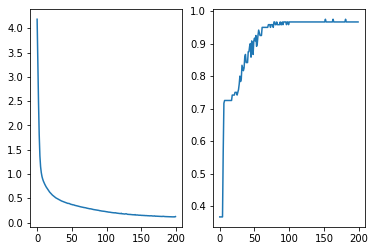

In [6]:
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])